In [33]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Load the dataset

data = pd.read_csv("/Users/sanjeevi.m/Desktop/Python Interview/Statistics/Central Limit Theoram/Sales_April_2019.csv")

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [36]:
data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
95,176648,27in FHD Monitor,1,149.99,04/24/19 01:17,"732 2nd St, Portland, OR 97035"
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"


In [37]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [38]:
# how many total missing values do we have?

total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

0.32094870260566827


In [39]:
# remove all the rows that contain a missing value
data.dropna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [40]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
filled_data = data.fillna(method='bfill', axis=0).fillna(0)

In [41]:
filled_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [47]:
# Sample the data
# To apply the central limit theorem, you need to take random samples from the dataset. 
# Let's say you want to take 100 samples of size 30 from the purchase amounts:

sample_size = 30
num_samples = 100

samples = []

for _ in range(num_samples):
    sample = np.random.choice(filled_data['Price Each'],size = sample_size)
    samples.append(sample)

In [48]:
# Calculate sample means
# Calculate the mean for each sample:

sample_means = []
for sample in samples:
    # Convert non-numeric values to NaN
    numeric_values = pd.to_numeric(sample, errors='coerce') # The errors='coerce' parameter is used to convert non-numeric values to NaN (Not a Number).
    # Calculate the mean only for numeric values
    sample_mean = np.mean(numeric_values[~np.isnan(numeric_values)])
    sample_means.append(sample_mean)
    
# This line calculates the mean of the numeric_values array. 
# First, it uses the np.isnan() function to create a boolean mask that checks for NaN values. 
# The ~ operator negates the mask, resulting in a mask that is True for non-NaN values. 
# Finally, it uses this mask to select only the non-NaN values from numeric_values and calculates their mean using the np.mean() function.

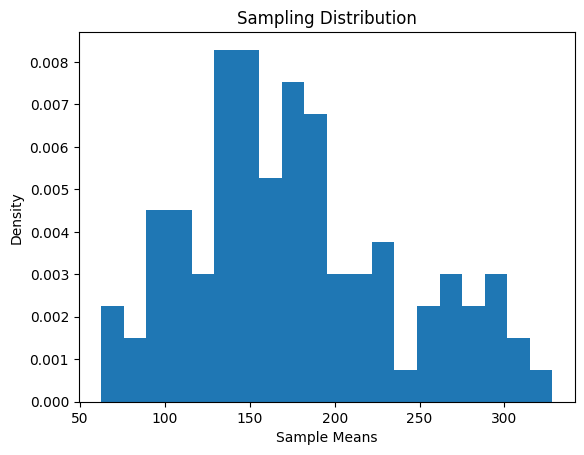

In [49]:
plt.hist(sample_means, bins=20, density=True)
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.title('Sampling Distribution')
plt.show()

In [50]:
population_mean = np.mean(sample_means)
print("Estimated population mean:", population_mean)

Estimated population mean: 176.46288813628897
